**Embedding with Sentence Transformers**

In [54]:
#!pip install sentence-transformers

In [55]:
from sentence_transformers import SentenceTransformer

model=SentenceTransformer('all-mpnet-base-v2')

In [56]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [57]:
embeddings = model.encode(sentences)
embeddings.shape

(7, 768)

**Question-Answering**

In [58]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer, \
                         DPRQuestionEncoder, DPRQuestionEncoderTokenizer

In [59]:
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [60]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?"
]

contexts = [
    "canberra is the capital city of australia",
    "what is the capital city of australia?",
    "the capital city of france is paris",
    "what is the best selling sci-fi book?",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "how many searches are performed on Google?",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine"
]

In [61]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length',
                          truncation=True, return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length',
                               truncation=True, return_tensors='pt')
xq = question_model(**xq_tokens)

In [62]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([9, 768]), torch.Size([3, 768]))

In [65]:
# Calculate cosine similarity
def cos_sim(a, b):
    return F.cosine_similarity(a, b)

# Compute similarity and print results
for i, xq_vec in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vec.unsqueeze(0), xb.pooler_output)
    argmax = torch.argmax(probs)
    print("Question:", questions[i])
    print("Probs shape:", probs.shape)
    print("Probs values:", probs)
    print("Index:", argmax)
    if argmax < len(contexts):
        print("Context:", contexts[argmax])
    else:
        print("Index out of range!")
    print('---')

Question: what is the capital city of australia?
Probs shape: torch.Size([9])
Probs values: tensor([0.7273, 0.6480, 0.5451, 0.3971, 0.3991, 0.4579, 0.4294, 0.3978, 0.4438],
       grad_fn=<SumBackward1>)
Index: tensor(0)
Context: canberra is the capital city of australia
---
Question: what is the best selling sci-fi book?
Probs shape: torch.Size([9])
Probs values: tensor([0.4009, 0.4262, 0.4236, 0.6245, 0.5939, 0.7017, 0.4561, 0.4309, 0.4551],
       grad_fn=<SumBackward1>)
Index: tensor(5)
Context: the best-selling sci-fi book is dune
---
Question: how many searches are performed on Google?
Probs shape: torch.Size([9])
Probs values: tensor([0.3960, 0.4536, 0.3841, 0.4723, 0.4986, 0.4569, 0.7098, 0.6687, 0.6306],
       grad_fn=<SumBackward1>)
Index: tensor(6)
Context: how many searches are performed on Google?
---


**Vision Transformers**

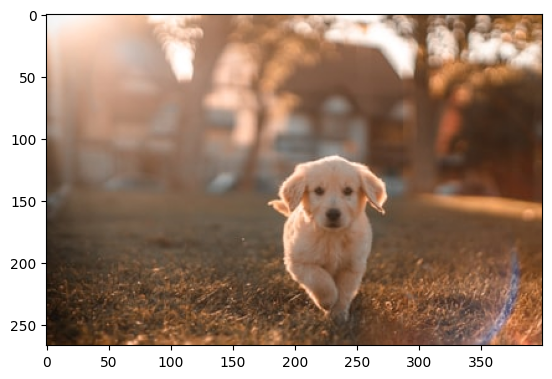

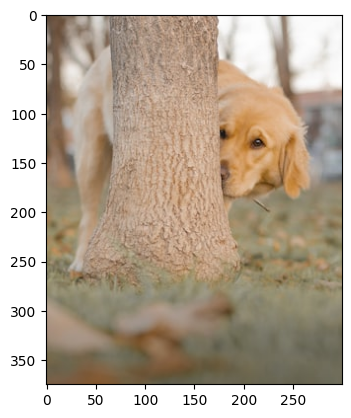

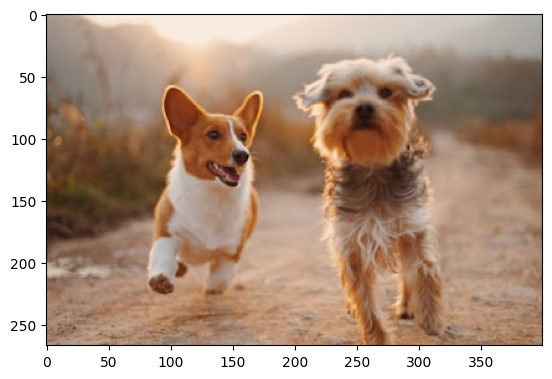

In [32]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [33]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [34]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]

inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([2, 0, 1])

a dog running


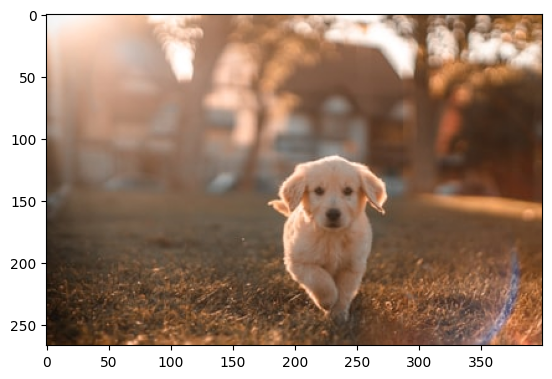

a dog hiding behind a tree


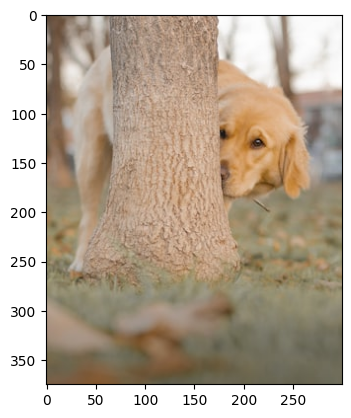

two dogs running


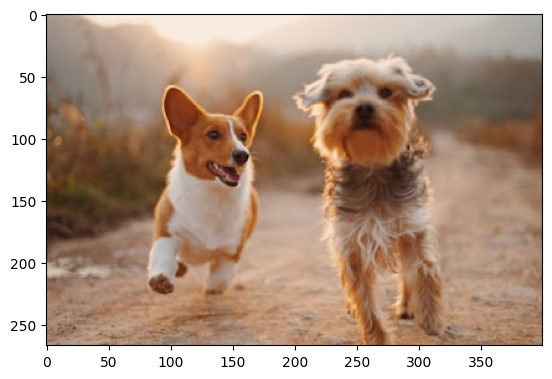

In [35]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

In [36]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [37]:
outputs.text_embeds.shape, outputs.image_embeds.shape

(torch.Size([6, 512]), torch.Size([3, 512]))

In [38]:
xq = outputs.text_embeds[0]  # 'a dog hiding behind a tree'
xb = outputs.image_embeds

In [39]:
sim = cos_sim(xq, xb)
sim

tensor([[ 0.8492,  0.8016,  0.4823, -0.4330,  0.4260,  0.9896, -0.9678, -0.9082,
          0.5975, -0.8228,  0.4226, -0.7923,  0.9326,  0.6755,  0.9472,  0.5399,
          0.9752, -0.1210, -0.5214, -0.4114, -0.8691,  0.3975,  0.3595, -0.7810,
         -0.8965,  0.3135,  0.9578, -0.4056,  0.6279,  0.5684, -0.3673,  0.6090,
         -0.2240, -0.7694, -0.1640, -0.9998, -0.1018,  0.8072,  0.7842,  0.9631,
         -0.9176, -0.7637,  0.5491,  0.9875,  0.9550,  0.5339, -0.8447,  0.2386,
          0.8092, -0.4704,  0.9994,  0.6671,  0.8037,  0.4123,  0.9923, -0.1857,
          0.9306, -0.6396, -0.8507,  0.8860,  0.7946, -0.1956,  0.9650,  0.5448,
         -0.5555, -0.8024,  0.6628, -0.9553, -0.8348, -0.4206, -0.7972,  0.3626,
         -0.9647,  0.0704,  0.9886,  0.7510,  0.3868, -0.8977, -0.7146,  0.9301,
         -0.8647, -0.2585,  0.5516, -0.9932,  0.9934,  0.8290,  0.9828,  0.9722,
          0.9203,  0.9964,  0.0538,  0.8593,  0.9996,  0.9268,  0.8347,  0.8162,
         -0.6188,  0.8310,  

In [68]:
pred = sim.argmax().item()
pred

133

In [69]:
plt.show(plt.imshow(np.asarray(images[pred])))

IndexError: list index out of range

In [46]:
plt.show(plt.imshow(np.asarray(images[pred])))

IndexError: list index out of range